In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from references.state_mapping import STATE_DISTRICT_MAPPING

pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", "{:,.2f}".format)

In [2]:
raw = pd.read_csv("data/processed/readable_transaction_01_09_2025.csv", na_values=["","-","   "])
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Property Type                    383584 non-null  object 
 1   District                         383584 non-null  object 
 2   Mukim                            383584 non-null  object 
 3   Scheme Name/Area                 383584 non-null  object 
 4   Road Name                        283469 non-null  object 
 5   Month, Year of Transaction Date  383584 non-null  object 
 6   Tenure                           383584 non-null  object 
 7   Land/Parcel Area                 383584 non-null  float64
 8   Unit                             383584 non-null  object 
 9   Main Floor Area                  283477 non-null  float64
 10  Unit                             283477 non-null  object 
 11  Unit Level                       383584 non-null  object 
 12  Tr

In [3]:
# Formatting/Cleaning Column Names
cols = raw.columns.str.strip().str.replace(" ","_").str.lower().str.replace(",","").str.replace("/","_or_")
print(cols)
data = raw.copy()
data.columns = cols
data.sample()

Index(['property_type', 'district', 'mukim', 'scheme_name_or_area',
       'road_name', 'month_year_of_transaction_date', 'tenure',
       'land_or_parcel_area', 'unit', 'main_floor_area', 'unit', 'unit_level',
       'transaction_price'],
      dtype='object')


,property_type,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,unit,main_floor_area,unit,unit_level,transaction_price
320907,Flat,Hulu Langat,Bandar Batu 18 Semenyih,TMN HARMONI (SEMENYIH),NaN,1/1/2024,Freehold,62.0,sq.m,NaN,NaN,2,120000


In [4]:
# Inspecting `unit` column 
print(data.iloc[:,8].unique())
print(data.iloc[:,10].unique())

# Dropping unit column as they are the same with the exception of missing data denoted by `-`
data = data.drop(columns="unit")
data.info()

['sq.m']
['sq.m' nan]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383584 entries, 0 to 383583
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   property_type                   383584 non-null  object 
 1   district                        383584 non-null  object 
 2   mukim                           383584 non-null  object 
 3   scheme_name_or_area             383584 non-null  object 
 4   road_name                       283469 non-null  object 
 5   month_year_of_transaction_date  383584 non-null  object 
 6   tenure                          383584 non-null  object 
 7   land_or_parcel_area             383584 non-null  float64
 8   main_floor_area                 283477 non-null  float64
 9   unit_level                      383584 non-null  object 
 10  transaction_price               383584 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 32.2+ MB


In [5]:
# Missing data analysis
print(data.isna().sum())
rows_missing = data[data.isna().any(axis=1)]
rows_missing.sample(5)

property_type                          0
district                               0
mukim                                  0
scheme_name_or_area                    0
road_name                         100115
month_year_of_transaction_date         0
tenure                                 0
land_or_parcel_area                    0
main_floor_area                   100107
unit_level                             0
transaction_price                      0
dtype: int64


,property_type,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,main_floor_area,unit_level,transaction_price
380338,Town House,Hulu Langat,Cheras,BDR DAMAI PERDANA,NaN,1/5/2022,Freehold,97.0,NaN,G,543000
294612,Condominium/Apartment,Seberang Perai Tengah,13,PANGSAPURI DELIMA EMAS,NaN,1/6/2022,Freehold,119.0,NaN,8,457000
380520,Town House,Hulu Langat,Pekan Kajang,COUNTRY HEIGHTS,NaN,1/11/2021,Leasehold,133.0,NaN,1,530000
258299,Condominium/Apartment,Johor Bahru,Pulai,TMN TAMPOI INDAH,NaN,1/2/2024,Leasehold,97.0,NaN,5,370000
295158,Condominium/Apartment,Seberang Perai Utara,14,PANGSAPURI SRI MEKAR,NaN,1/11/2023,Freehold,83.0,NaN,6,280000


In [6]:
# The rows with missing data are typically multi level apartments, the roads are also likely shared. 
# The missing data likely will have minial impact on the analysis.
rows_missing.property_type.unique()

array(['1 - 1 1/2 Storey Terraced', 'Condominium/Apartment', 'Detached',
       'Flat', 'Low-Cost Flat', 'Town House'], dtype=object)

In [7]:
data["district"].unique()

array(['Alor Gajah', 'Bachok', 'Bagan Datuk', 'Bahagian Betong',
       'Bahagian Bintulu', 'Bahagian Kapit', 'Bahagian Kuching',
       'Bahagian Limbang', 'Bahagian Miri', 'Bahagian Mukah',
       'Bahagian Samarahan', 'Bahagian Sarikei', 'Bahagian Serian',
       'Bahagian Sibu', 'Bahagian Sri Aman', 'Baling', 'Bandar Baru',
       'Barat Daya', 'Batang Padang', 'Batu Pahat', 'Beaufort', 'Bentong',
       'Bera', 'Besut', 'Cameron Highland', 'Dungun', 'Gombak',
       'Gua Musang', 'Hilir Perak', 'Hulu Langat', 'Hulu Perak',
       'Hulu Selangor', 'Hulu Terengganu', 'Jasin', 'Jelebu', 'Jeli',
       'Jempol', 'Jerantut', 'Johor Bahru', 'Kampar', 'Kemaman',
       'Keningau', 'Kerian', 'Kinta', 'Klang', 'Kluang', 'Kota Bahru',
       'Kota Belud', 'Kota Kinabalu', 'Kota Marudu', 'Kota Setar',
       'Kota Tinggi', 'Kuala Kangsar', 'Kuala Krai', 'Kuala Langat',
       'Kuala Lumpur', 'Kuala Muda', 'Kuala Nerus', 'Kuala Pilah',
       'Kuala Selangor', 'Kuala Terengganu', 'Kuantan', '

In [8]:
# Renaming `RoMPin` in district column to `Rompin`
print(data.query("district == 'RoMPin'").head(2))
data["district"] = data["district"].replace("RoMPin", "Rompin")

         property_type district   mukim  scheme_name_or_area        road_name  \
376384  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA     DESA CEMPAKA   
376385  Low-Cost House   RoMPin   Bebar  PPR(M) DESA CEMPAKA  JALAN CEMPAKA 1   

       month_year_of_transaction_date     tenure  land_or_parcel_area  \
376384                       1/5/2022  Leasehold                122.0   
376385                       1/5/2022  Leasehold                122.0   

        main_floor_area unit_level  transaction_price  
376384             63.0                        120000  
376385             63.0                        140000  

In [9]:
data.query("district == 'Rompin'").sample(5)

,property_type,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,main_floor_area,unit_level,transaction_price
93226,1 - 1 1/2 Storey Terraced,Rompin,Keratong,PER GENERASI BAHARU FELDA KERATONG 4,JALAN KERATONG PERMAI 1,1/10/2023,Leasehold,130.06,77.0,,90000
93182,1 - 1 1/2 Storey Terraced,Rompin,Endau,PERUMAHAN GEN BAHARU FELDA SELENDANG 2,JLN SELENDANG JAYA 3,1/1/2023,Leasehold,282.00,76.0,,108000
93194,1 - 1 1/2 Storey Terraced,Rompin,Endau,PERUMAHAN GEN BAHARU FELDA SELENDANG 2,JLN SELENDANG JAYA 6,1/3/2024,Leasehold,130.00,76.0,,90000
93249,1 - 1 1/2 Storey Terraced,Rompin,Keratong,PER GENERASI BAHARU FELDA KERATONG 4,JALAN KERATONG PERMAI 2,1/12/2023,Leasehold,249.68,77.0,,108000
376398,Low-Cost House,Rompin,Rompin,PAKR TAMAN SRI ROMPIN,JALAN SG PUTERI 8,1/1/2022,Leasehold,426.00,59.0,,180000


In [10]:
state = data["district"].map(STATE_DISTRICT_MAPPING)
data.insert(1,"state",state)
data.sample(5)

,property_type,state,district,mukim,scheme_name_or_area,road_name,month_year_of_transaction_date,tenure,land_or_parcel_area,main_floor_area,unit_level,transaction_price
376742,Low-Cost House,Pulau Pinang,Seberang Perai Selatan,11,R/MURAH JAWI,TINGKAT SERINDIT 2,1/6/2024,Freehold,87.0,77.0,,240000
101643,1 - 1 1/2 Storey Terraced,Negeri Sembilan,Seremban,Rantau,TMN SERI MAMBAU,JLN SERI MAMBAU A12,1/1/2025,Freehold,111.0,67.0,,240000
279896,Condominium/Apartment,Perak,Larut Matang,Tupai,CRYSTAL CREEK RESORT,NaN,1/8/2023,Freehold,124.3,NaN,7,250000
226664,2 - 2 1/2 Storey Terraced,Negeri Sembilan,Seremban,Labu,TIARA SENDAYAN - PRESINT 13,PRECINT 13,1/8/2022,Freehold,328.0,160.0,,572000
211199,2 - 2 1/2 Storey Terraced,Selangor,Petaling,Sungai Buluh,TAMAN NUSA SUBANG,JLN QAMARI U5/108,1/1/2025,Leasehold,139.0,167.0,,555000


In [ ]:
# Persist the Results
# data.to_csv("data/processed/processed_data.csv", index=False)

## Starting Analysis
- mean/median price by state and property type
- tenure and highest property type counts
- transaction counts across time by state, and property type
- correlation between floor area and price

In [14]:
data.describe()

,land_or_parcel_area,main_floor_area,transaction_price
count,"383,584.00","283,477.00","383,584.00"
mean,192.62,127.79,"496,467.24"
std,"4,166.07",315.35,"545,792.88"
min,8.27,0.00,"5,000.00"
25%,100.00,80.00,"248,000.00"
50%,130.00,110.00,"370,000.00"
75%,188.00,158.00,"570,000.00"
max,"1,788,888.00","159,390.00","38,000,000.00"


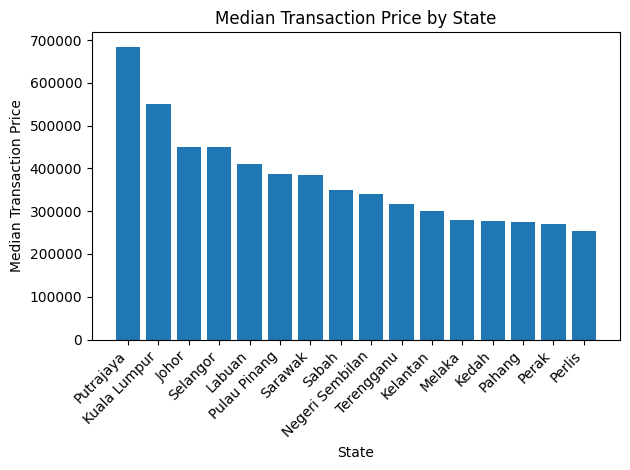

In [54]:
median_price_state = data[["state", "transaction_price"]].groupby("state").median().sort_values("transaction_price", ascending=False)
plt.bar(median_price_state.index, median_price_state["transaction_price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Median Transaction Price")
plt.xlabel("State")
plt.title("Median Transaction Price by State")
plt.tight_layout()
plt.show()

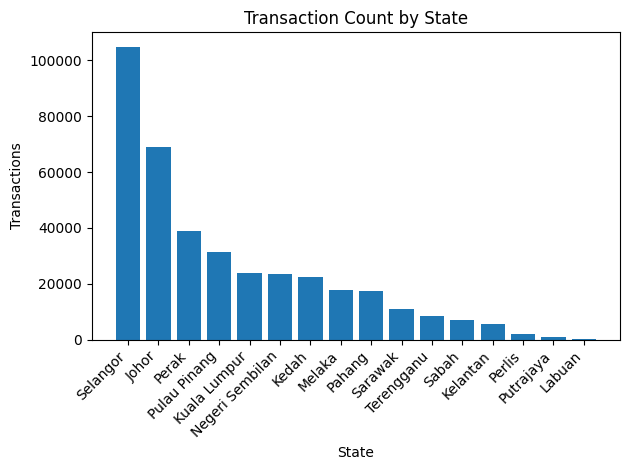

In [55]:
transaction_count_state = data[["state", "transaction_price"]].groupby("state").count().sort_values("transaction_price", ascending=False)
plt.bar(transaction_count_state.index, transaction_count_state["transaction_price"])
plt.xticks(rotation=45, ha="right")  # rotate 45°, align to the right
plt.ylabel("Transactions")
plt.xlabel("State")
plt.title("Transaction Count by State")
plt.tight_layout()
plt.show()

C:\Users\faisa\AppData\Local\Temp\ipykernel_23440\94627476.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")


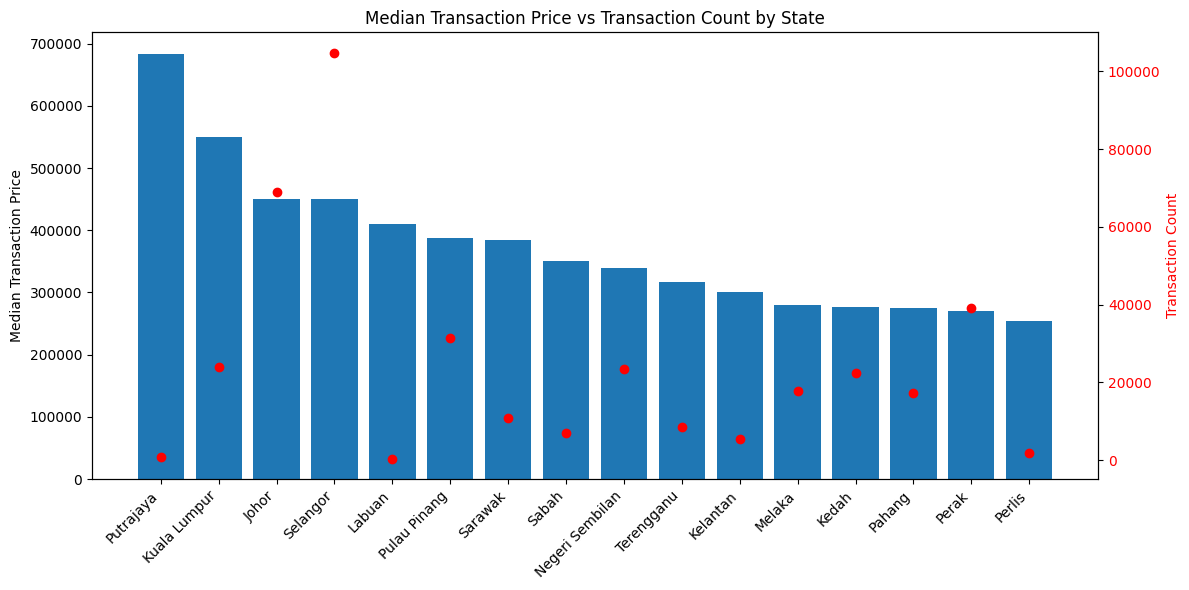

In [51]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(median_price_state.index, median_price_state["transaction_price"])
ax1.set_ylabel("Median Transaction Price")
ax1.tick_params(axis="y")
ax1.set_xticklabels(median_price_state.index, rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.scatter(transaction_count_state.index, transaction_count_state["transaction_price"], color="red", marker="o")
ax2.set_ylabel("Transaction Count", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Median Transaction Price vs Transaction Count by State")
plt.tight_layout()
plt.show()